<a href="https://colab.research.google.com/github/shahchayan9/Dimensionality-Reduction/blob/main/Locally_Linear_Embedding_(LLE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Locally Linear Embedding in Machine Learning


---

## Introduction

**Locally Linear Embedding (LLE)** is an unsupervised machine learning technique designed to transform data from its original high-dimensional space into a lower-dimensional representation. The primary goal is to retain the essential geometric characteristics of the underlying non-linear feature structure.

---

## Key Steps in LLE

### 1. Nearest Neighbors Graph Construction
- LLE begins by constructing a nearest neighbors graph to capture local relationships between data points.

### 2. Weight Optimization
- For each data point, LLE optimizes weight values that minimize the reconstruction error. This involves expressing each data point as a linear combination of its neighbors.
- The **weight matrix** reflects the strength of connections between points.

### 3. Eigenvector Computation
- LLE computes a lower-dimensional representation by finding the **eigenvectors** of a matrix derived from the weight matrix.
- These eigenvectors represent the most relevant directions in the reduced space.

---

## Output Space Dimensionality
- Users can specify the desired dimensionality for the output space.
- LLE selects the top eigenvectors corresponding to the most significant directions.

---

### Summary
LLE is a powerful tool for dimensionality reduction, particularly effective for non-linear datasets where traditional linear methods like PCA may fail to preserve local geometric structures.

# Locally Linear Embedding (LLE) Algorithm

---

## Key Steps in the LLE Algorithm

### 1. Neighborhood Selection
- For each data point in the high-dimensional space, LLE identifies its **k-nearest neighbors**.
- This step assumes that each data point can be well-approximated by a linear combination of its neighbors.

---

### 2. Weight Matrix Construction
- LLE computes a set of weights for each data point to express it as a linear combination of its neighbors.
- The weights are determined to minimize the **reconstruction error**.
- Linear regression techniques are often used to find these weights.

---

### 3. Global Structure Preservation
- LLE seeks a lower-dimensional representation that preserves the **local linear relationships**.
- It minimizes a cost function that evaluates how well each data point can be represented by its neighbors.

---

### 4. Output Embedding
- After the optimization process, LLE provides the final lower-dimensional representation of the data.
- This representation retains the essential structure of the data while reducing dimensionality.

---

<br>


## Parameters in the LLE Algorithm

### 1. k (Number of Neighbors)
- Determines the number of nearest neighbors considered for constructing the weight matrix.
- **Trade-offs**:
  - Larger \(k\): Captures more global relationships but may introduce noise.
  - Smaller \(k\): Focuses on local relationships but is sensitive to outliers.

### 2. Dimensionality of Output Space
- Specifies the dimensionality of the reduced space.
- Balances between computational complexity and information preservation.

### 3. Distance Metric
- Defines proximity between data points.
- Common choices:
  - **Euclidean distance**
  - **Manhattan distance**
  - Custom-defined metrics

### 4. Regularization (Optional)
- Adds regularization terms to the cost function to prevent overfitting.
- Useful when dealing with noisy data or a high number of neighbors.

### 5. Optimization Algorithm (Optional)
- Utilizes optimization techniques like **Singular Value Decomposition (SVD)** or eigenvector methods to derive the lower-dimensional representation.

---

## Advantages of LLE
- LLE surpasses traditional density modeling techniques like local PCA or mixtures of factor analyzers.
- Unlike density models, LLE establishes global coordinates capable of embedding observations across the structural manifold.
- It excels at capturing intricate curved patterns within the data.

---

## Enhanced Computational Efficiency
- LLE leverages **sparse matrix handling**, ensuring superior computational efficiency compared to other algorithms.

---

LLE is particularly effective for non-linear data structures, providing insights that are difficult to capture using traditional methods.



In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.manifold import LocallyLinearEmbedding  # Import LocallyLinearEmbedding
from sklearn import manifold
from time import time

In [ ]:

!pip install kaggle

# Upload your kaggle.json file (contains API credentials)
from google.colab import files
files.upload()

# Make a directory named kaggle and copy the kaggle.json file there
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Change the permissions of the file
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset from kaggle
!kaggle datasets download -d zalando-research/fashionmnist

# Unzip the downloaded dataset
!unzip fashionmnist.zip

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/zalando-research/fashionmnist
License(s): other
 73% 50.0M/68.8M [00:00<00:00, 186MB/s]
100% 68.8M/68.8M [00:00<00:00, 180MB/s]
Archive:  fashionmnist.zip
  inflating: fashion-mnist_test.csv  
  inflating: fashion-mnist_train.csv  
  inflating: t10k-images-idx3-ubyte  
  inflating: t10k-labels-idx1-ubyte  
  inflating: train-images-idx3-ubyte  
  inflating: train-labels-idx1-ubyte  


In [ ]:
df_origin = pd.read_csv('fashion-mnist_train.csv', header = None)
display(df_origin.head())

<ipython-input-5-175406481e1d>:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,2

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
4,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0


In [ ]:
df_labels = df_origin.iloc[1:, 0]
df_images = df_origin.iloc[1:, 1:]

labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
         'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_dev, y_train, y_dev = train_test_split(df_images, df_labels, test_size=0.2)
print(X_train.shape, X_dev.shape, y_train.shape, y_dev.shape)

(48000, 784) (12000, 784) (48000,) (12000,)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

X_train_standardized = StandardScaler().fit_transform(X_train)
X_dev_standardized = StandardScaler().fit_transform(X_dev)

In [ ]:
X_train_normalized = Normalizer().fit_transform(X_train_standardized)
X_dev_normalized = Normalizer().fit_transform(X_dev_standardized)

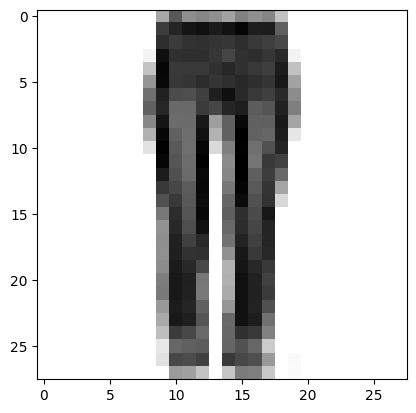

In [ ]:
#Plot images of the fashion-mnist
num = 10
plt.imshow(X_dev.values.astype(int)[num].reshape(28,28), cmap=plt.cm.binary)

In [ ]:
# Visualize the embedding vectors
from matplotlib import offsetbox

def plot_embedding_v2(X, X_origin, title=None, dims=[None, 28, 28],myfigsize = (12,12)):
    dims[0] = X.shape[0]
    X_origin = X_origin.values.astype(float).reshape(dims)
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=myfigsize)
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y_dev.values[i]),
                 color=plt.cm.Set1(y_dev.values.astype(int)[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 3e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(X_origin[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

Computing LLE embedding
Done. Reconstruction error: 8.77114e-06


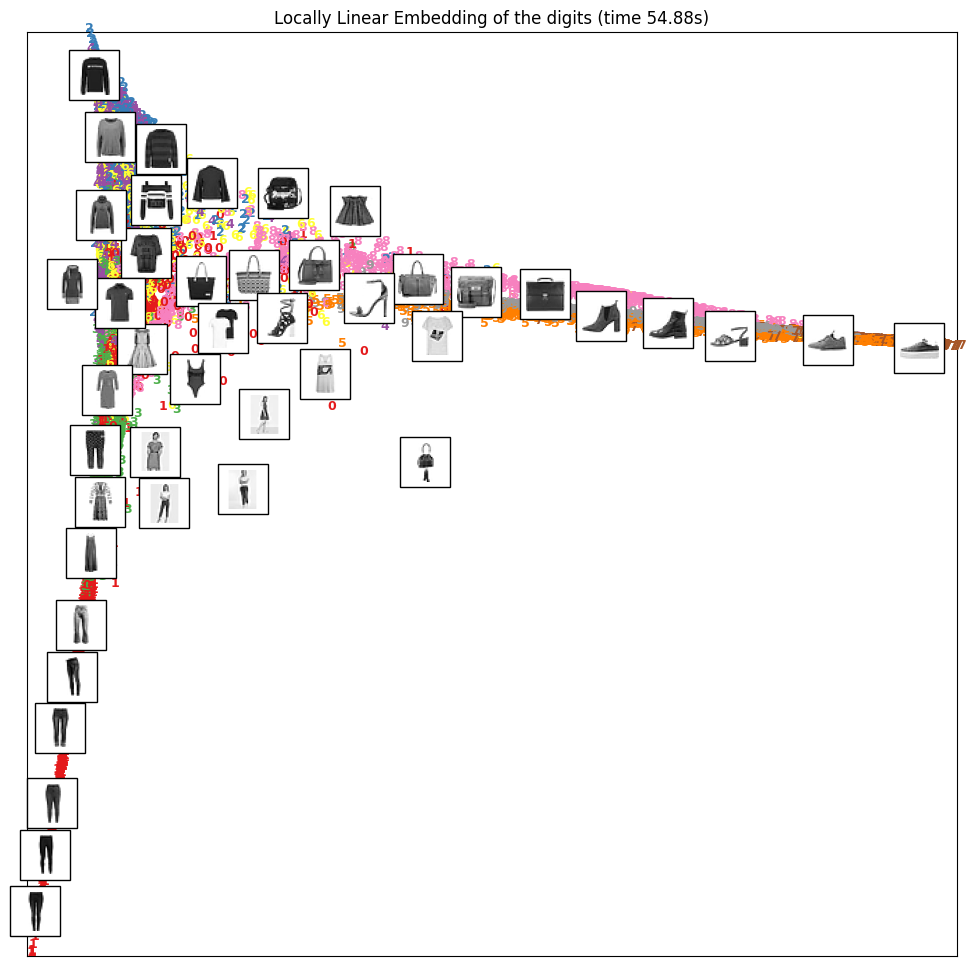

In [ ]:
# Locally linear embedding of the fashion-mnist dataset
print("Computing LLE embedding")
n_neighbors = 30
clf = manifold.LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=2,
                                      method='standard') # Pass n_neighbors and n_components as keyword arguments
t0 = time()
X_lle = clf.fit_transform(X_dev_normalized)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding_v2(X_lle, X_dev,
               "Locally Linear Embedding of the digits (time %.2fs)" %
               (time() - t0), myfigsize=(12, 12))

Computing modified LLE embedding
Done. Reconstruction error: 0.281785


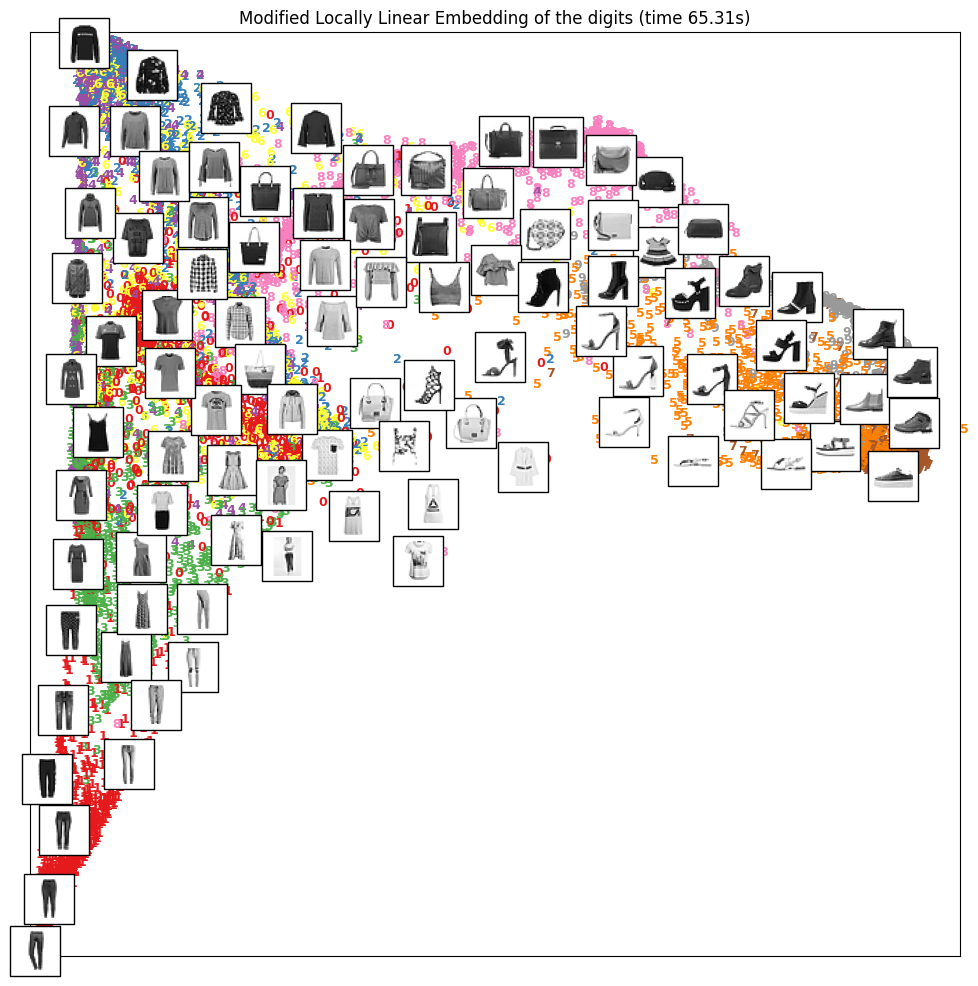

In [ ]:
# Modified Locally linear embedding
print("Computing modified LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors = n_neighbors, n_components=2,
                                      method='modified')
t0 = time()
X_mlle = clf.fit_transform(X_dev_normalized)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding_v2(X_mlle, X_dev,
               "Modified Locally Linear Embedding of the digits (time %.2fs)" %
               (time() - t0))

# Advantages and Disadvantages of Locally Linear Embedding (LLE)

---

## Advantages of LLE

1. **Preservation of Local Structures**
   - LLE excels at maintaining local relationships or structures in the data.
   - It effectively captures the inherent geometry of nonlinear manifolds by preserving pairwise distances between nearby points.

2. **Handling Non-Linearity**
   - Unlike linear techniques like Principal Component Analysis (PCA), LLE can capture **nonlinear patterns** and structures.
   - It is particularly useful for datasets that are **complex, curved, or twisted**.

3. **Dimensionality Reduction**
   - LLE reduces the dimensionality of data while retaining its fundamental properties.
   - This simplification is especially beneficial for high-dimensional datasets, aiding in **data visualization, exploration, and analysis**.

---

## Disadvantages of LLE

1. **Curse of Dimensionality**
   - LLE, like many dimensionality reduction techniques, is affected by the "curse of dimensionality."
   - As dimensionality increases, the number of neighbors required to capture local interactions grows, leading to higher computational costs.

2. **Memory and Computational Requirements**
   - Constructing a weighted adjacency matrix for LLE can be **memory-intensive** for large datasets.
   - The eigenvalue decomposition step can also become computationally expensive.

3. **Sensitivity to Outliers and Noisy Data**
   - LLE is vulnerable to anomalies and noisy data points.
   - Outliers can distort local linear relationships and negatively impact the quality of the embedding.

---

LLE offers powerful capabilities for dimensionality reduction and nonlinear pattern detection, making it highly valuable for various data science and machine learning tasks. However, its limitations require careful parameter tuning and preprocessing to ensure optimal results.
